___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [31]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [35]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [36]:
# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)

# CitiGroup
C = data.DataReader("C", 'google', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)

In [37]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [38]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [39]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)


** Set the column name levels (this is filled out for you):**

In [40]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [41]:
bank_stocks.head()

Bank Ticker    BAC                                      C                \
Stock Info    Open   High    Low  Close     Volume   Open   High    Low   
Date                                                                      
2016-11-07   16.86  17.04  16.85  17.01   91581902  49.26  49.84  49.21   
2016-11-08   16.82  17.10  16.71  17.00   95842770  49.42  50.02  49.04   
2016-11-09   17.66  18.05  17.40  17.97  319516881  50.07  51.94  49.47   
2016-11-10   18.26  18.99  18.25  18.76  304986449  52.05  54.20  51.74   
2016-11-11   18.64  19.03  18.63  19.02  212952487  52.76  53.16  51.60   

Bank Ticker                     ...         MS                                 \
Stock Info   Close    Volume    ...       Open   High    Low  Close    Volume   
Date                            ...                                             
2016-11-07   49.82  19357566    ...      33.57  34.00  33.57  34.00  11328047   
2016-11-08   49.91  17548250    ...      33.81  34.28  33.54  34.10   7370494   
2016-11-09   51.59  59210448    ...      34.70  36.91  34.47  36.52  28311033   
2016-11-10   53.61  52067278    ...      36.72  38.94  36.72  38.02  38587204   
2016-11-11   52.83  41858608    ...      37.37  38.75  37.34  38.49  22845455   

Bank Ticker    WFC                                  
Stock Info    Open   High    Low  Close     Volume  
Date                                                
2016-11-07   45.22  45.69  45.21  45.40   25769393  
2016-11-08   45.18  45.82  44.87  45.54   19462621  
2016-11-09   46.33  48.61  46.00  47.99   67615042  
2016-11-10   48.93  51.93  48.79  51.63  100988797  
2016-11-11   51.09  51.99  50.73  51.73   46594895  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [42]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     27.87
C       75.72
GS     252.89
JPM    101.77
MS      51.16
WFC     59.73
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [43]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [44]:
for tick in tickers:  
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-08,-0.000588,0.001807,0.002425,0.002147,0.002941,0.003084
2016-11-09,0.057059,0.033661,0.058872,0.045980,0.070968,0.053799
2016-11-10,0.043962,0.039155,0.042776,0.046416,0.041073,0.075849
2016-11-11,0.013859,-0.014550,0.015284,0.000522,0.012362,0.001937


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

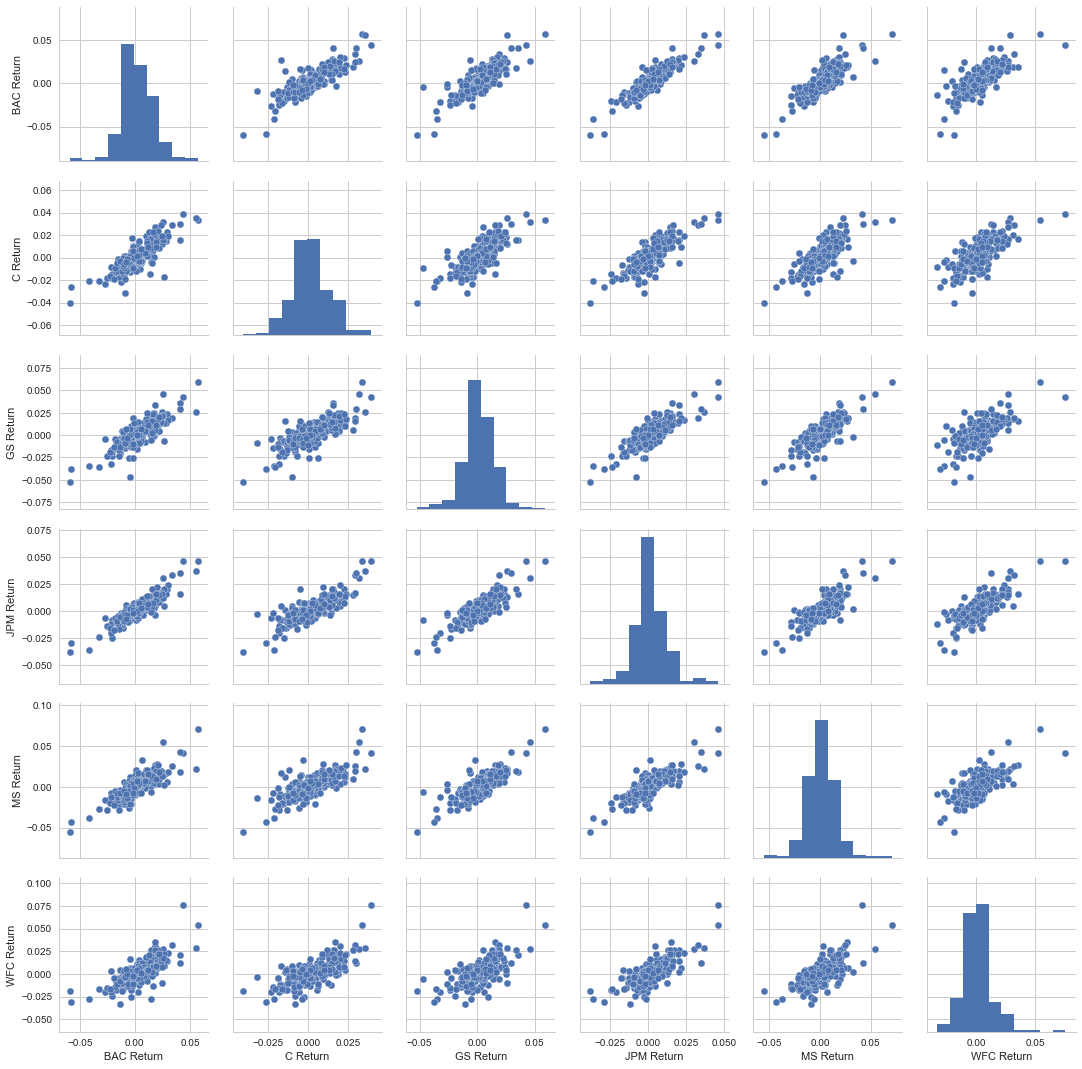

In [45]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [46]:
returns.idxmin()

BAC Return   2017-05-17
C Return     2017-05-17
GS Return    2017-05-17
JPM Return   2017-05-17
MS Return    2017-05-17
WFC Return   2017-04-13
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [47]:
returns.idxmax()

BAC Return   2016-11-09
C Return     2016-11-10
GS Return    2016-11-09
JPM Return   2016-11-10
MS Return    2016-11-09
WFC Return   2016-11-10
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [48]:
returns.std()

BAC Return    0.014913
C Return      0.011901
GS Return     0.013726
JPM Return    0.010902
MS Return     0.014344
WFC Return    0.012790
dtype: float64

In [49]:
returns.ix['2016-01-01':'2016-12-31'].std()

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



BAC Return    0.020029
C Return      0.015063
GS Return     0.017265
JPM Return    0.014275
MS Return     0.016969
WFC Return    0.020015
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\srika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6201: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\srika\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\srika\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\srika\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\srika\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning:

invalid value encountered in minimum



ZeroDivisionError: 0.0 cannot be raised to a negative power

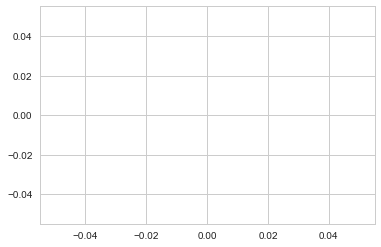

In [50]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [ ]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

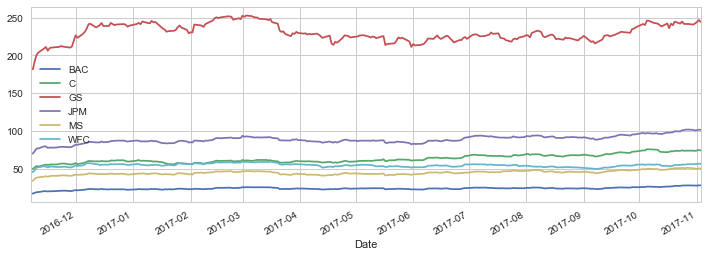

In [51]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

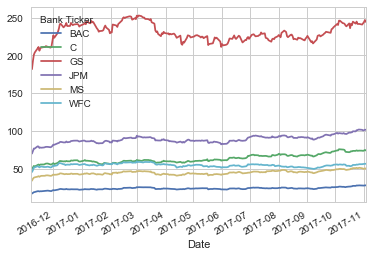

In [52]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').plot()

In [53]:
bank_stocks.xs(key='Close', axis=1, level = "Stock Info").iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

TypeError: Empty 'DataFrame': no numeric data to plot

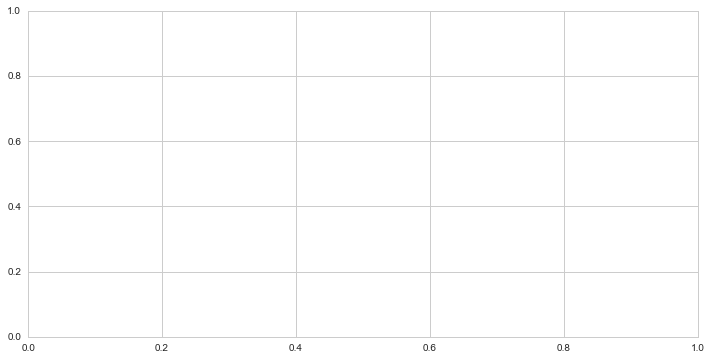

In [30]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label = '30 Day Avg')
BAC['Close'].loc['2008-01-01': '2009-01-01'].plot('BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

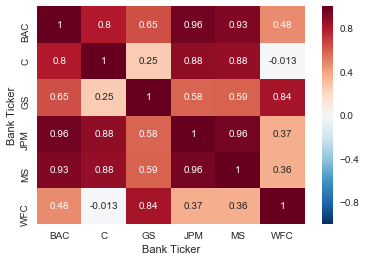

In [56]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

C:\Users\srika\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



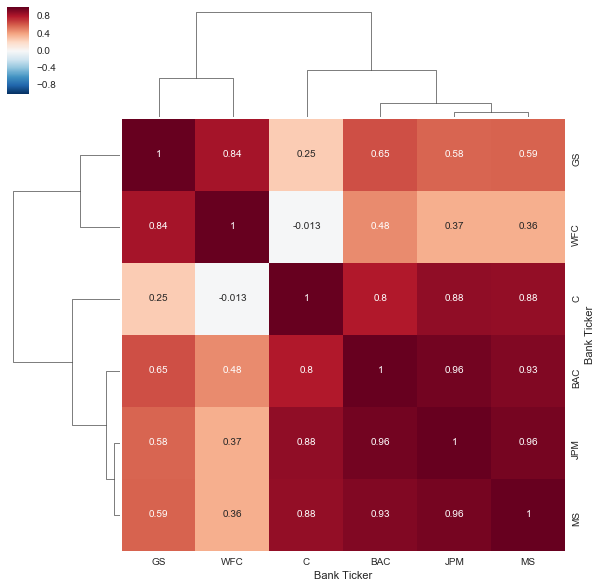

In [57]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

In [42]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [58]:
BAC[['Open','High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [126]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55], title = 'Simply Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [59]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\srika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.